In [1]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [2]:
import numpy as np
from scipy import integrate, stats, interpolate
from toolbox import vis
from toolbox import as_toolbox as ast
import urllib
import matplotlib.pyplot as plt
import importlib as il
from iminuit import Minuit
import toolbox
from scipy import optimize

# Ex. 1 

In [5]:
#define pdf we sample from
alpha_real, beta_real = .5, .5 
xmin, xmax = -1.02, 1.11
def func_pdf(x, alpha = alpha_real, beta = beta_real, gamma = 0): 
    return (1 + alpha*x + beta*x**2)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3)
#generate points
N_f = 3000
ymax = func_pdf(xmax, alpha_real, beta_real) 
x_rand = ast.accept_reject(func_pdf, N_f, xmin, xmax, ymax)
alpha_test = np.linspace(.4,.6,80)
beta_test = np.linspace(.4,.6,80)
f_unbinnednllh = ast.UNLLH_scan(func_pdf, x_rand)
grid, llh_arr = f_unbinnednllh(alpha_test, beta_test)

In [6]:
sig1 = llh_arr.min()+.5
sig2 = llh_arr.min()+2

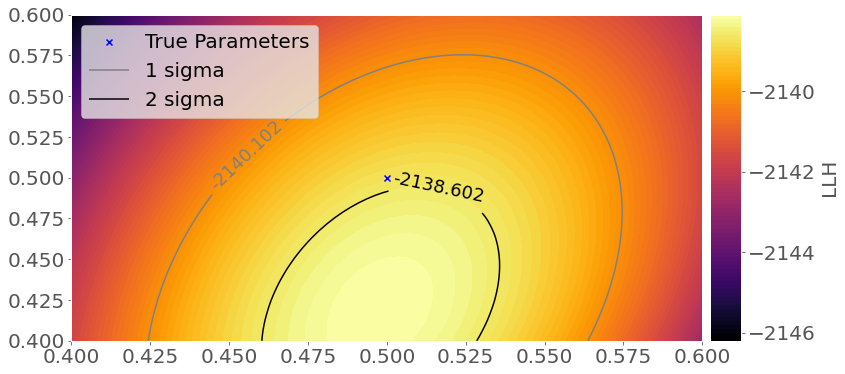

In [11]:
fig, ax = vis.nice_contour(grid[0], grid[1], -llh_arr, cbar_label='LLH', levels = 90, show_plot=False)
ax.scatter(.5,.5,marker = 'x', label = 'True Parameters', color = 'blue')
fig, ax = vis.nice_contour(grid[0], grid[1], -llh_arr, cbar_label='LLH', levels = -np.array([sig2, sig1]),
                           filled = False, show_plot=False, axis = ax, figure = fig, show_cbar = False,
                           colors = ['grey','k'], clabels = ['1 sigma', '2 sigma'], plot_legend=True,
                          labels_inline = True, legend_fs = 20, legend_loc = 2, plot_clabels=True)
fig

### Lets try to plot densities in 3d

In [3]:
from mayavi import mlab

In [22]:
xmin, ymin, zmin = -1, -1, -1
xmax, ymax, zmax = 1, 1, 1
xi, yi, zi = np.mgrid[xmin:xmax:.1, ymin:ymax:.1, zmin:zmax:.1]
pos = np.stack((xi, yi, zi), axis = 3)
rv = stats.multivariate_normal(mean = np.array([0,0,0]), cov = np.array([[.2,0,0],[0,.7,0],[0,0,.1]  ]))
density = rv.pdf(pos)*np.sin(xi)*np.sin(yi)+1


In [23]:

figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)

mlab.pipeline.volume(grid, vmin=density.min()*.1, vmax=density.max())
#mlab.volume_slice(density, plane_orientation='y_axes', slice_index=10)
mlab.axes()
mlab.show()


# Ex. 2 